In [ ]:
import requests
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
API_KEY = 'ZB07KLJJLBBG7ION'
symbol = 'AAPL'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=ZB07KLJJLBBG7ION'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-06-18 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-06-18 19:55:00': {'1. open': '170.4000', '2. high': '170.7000', '3. low': '170.3600', '4. close': '170.3600', '5. volume': '218'}, '2024-06-18 19:45:00': {'1. open': '170.3600', '2. high': '170.7000', '3. low': '170.3600', '4. close': '170.3800', '5. volume': '23'}, '2024-06-18 19:40:00': {'1. open': '170.3600', '2. high': '170.3600', '3. low': '170.3600', '4. close': '170.3600', '5. volume': '0'}, '2024-06-18 19:35:00': {'1. open': '170.4000', '2. high': '170.4000', '3. low': '170.3600', '4. close': '170.3600', '5. volume': '101'}, '2024-06-18 19:20:00': {'1. open': '170.5800', '2. high': '170.5800', '3. low': '170.5800', '4. close': '170.5800', '5. volume': '3'}, '2024-06-18 19:15:00': {'1. open': '170.5400', '2. high':

In [ ]:
# Check if the response contains the expected data
if "Time Series (5min)" in data:
    time_series = data["Time Series (5min)"]

    # Convert the time series data into a DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.astype(float)

    print(df.head(5))
else:
    print("Error: ", data.get("Note", "Unexpected response format"))

                     1. open  2. high  3. low  4. close  5. volume
2024-06-18 19:55:00   170.40   170.70  170.36    170.36      218.0
2024-06-18 19:45:00   170.36   170.70  170.36    170.38       23.0
2024-06-18 19:40:00   170.36   170.36  170.36    170.36        0.0
2024-06-18 19:35:00   170.40   170.40  170.36    170.36      101.0
2024-06-18 19:20:00   170.58   170.58  170.58    170.58        3.0


In [ ]:
df.columns = ['open', 'high', 'low', 'close', 'volume']
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index)

In [ ]:
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()
df['RSI'] = compute_rsi(df['close'])

NameError: name 'compute_rsi' is not defined

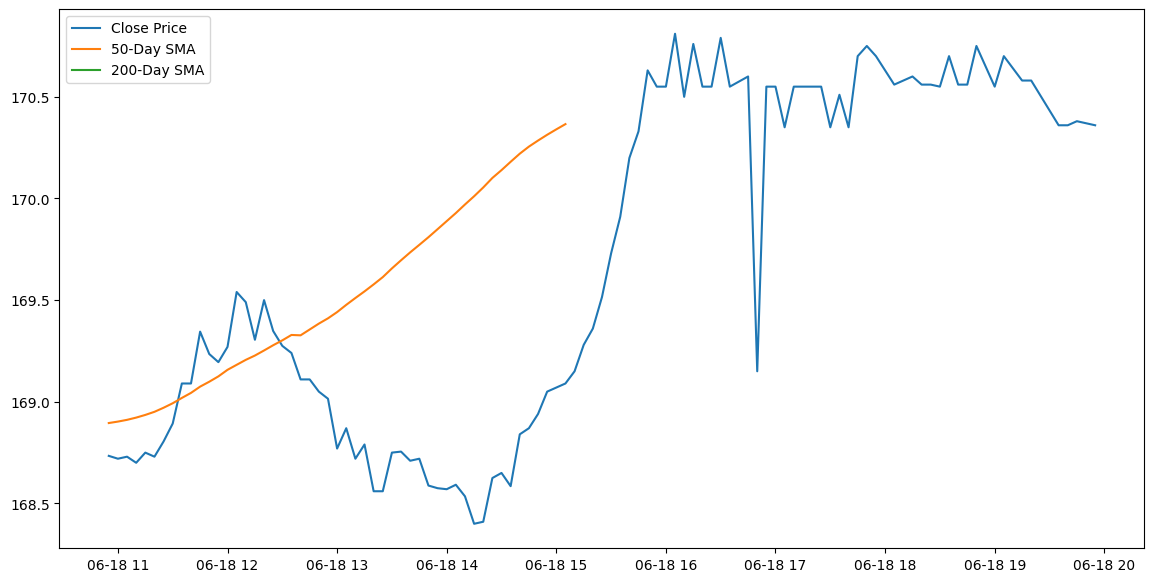

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.plot(df['SMA_200'], label='200-Day SMA')
plt.legend()
plt.show()

In [ ]:
# Data parsing

df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

                  datetime        open        high         low      close  \
count                    5    5.000000    5.000000    5.000000    5.00000   
mean   2024-06-18 19:39:00  170.420000  170.548000  170.404000  170.40800   
min    2024-06-18 19:20:00  170.360000  170.360000  170.360000  170.36000   
25%    2024-06-18 19:35:00  170.360000  170.400000  170.360000  170.36000   
50%    2024-06-18 19:40:00  170.400000  170.580000  170.360000  170.36000   
75%    2024-06-18 19:45:00  170.400000  170.700000  170.360000  170.38000   
max    2024-06-18 19:55:00  170.580000  170.700000  170.580000  170.58000   
std                    NaN    0.091652    0.161617    0.098387    0.09654   

           volume  
count    5.000000  
mean    69.000000  
min      0.000000  
25%      3.000000  
50%     23.000000  
75%    101.000000  
max    218.000000  
std     92.814331  


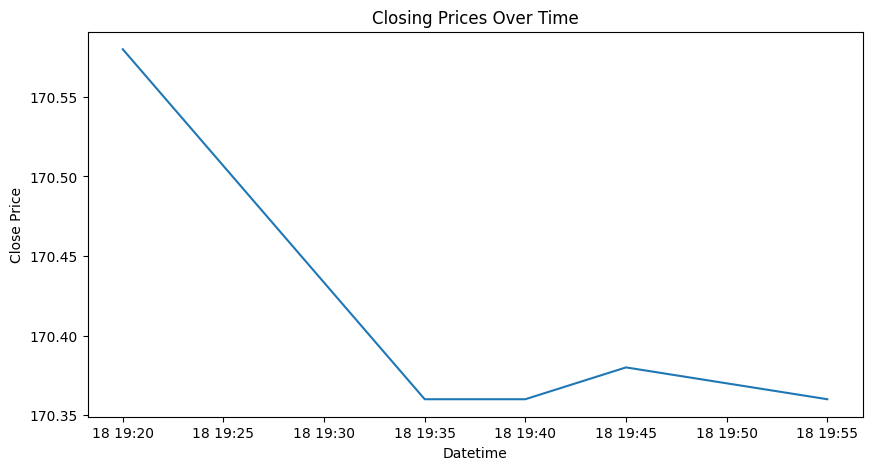

In [ ]:
# Basic statistics
print(df.describe())

# Plot closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Feature engineering
df['timestamp'] = df['datetime'].values.astype(float) / 10**9

# Split data into train and test sets
X = df[['timestamp']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model development
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.00012543999942516034


In [ ]:
# Make predictions for the last five entries
df_last_five = df.tail(5)
df_last_five['predicted_close'] = model.predict(df_last_five[['timestamp']])

# Create candlestick chart with predictions
fig = go.Figure(data=[go.Candlestick(
    x=df_last_five['datetime'],
    open=df_last_five['open'],
    high=df_last_five['high'],
    low=df_last_five['low'],
    close=df_last_five['close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.add_trace(go.Scatter(
    x=df_last_five['datetime'],
    y=df_last_five['predicted_close'],
    mode='lines',
    name='Predicted Close',
    line=dict(color='blue', dash='dash')
))

# Add titles and labels
fig.update_layout(
    title=f'Candlestick Chart for IBM with Predictions',
    xaxis_title='Datetime',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Display the chart
fig.show()


<ipython-input-17-e7e405d613a0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.4 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(children=[
    html.H1(children='Stock Price Analysis'),

    dcc.Graph(
        id='candlestick-chart',
        figure=fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>